In [331]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline
import statistics
import datetime
import calendar

In [332]:
bike_day = pd.read_csv(r"C:\Users\Lucia\Desktop\Data Analytics\Bike Project\day.csv")
bike_hour = pd.read_csv(r"C:\Users\Lucia\Desktop\Data Analytics\Bike Project\hour.csv")

In [333]:
# Creating a DataFrame
day = pd.DataFrame(bike_day)
hour = pd.DataFrame(bike_hour)

In [335]:
day['dteday'] = pd.to_datetime(day['dteday'], format='%Y/%m/%d')
# day['mnth'] = pd.to_datetime(day['mnth'], format='%y/%M/%d')
#day_mini = day['day'] = day['dteday'].dt.day



In [336]:
day.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

#### Colour Palette

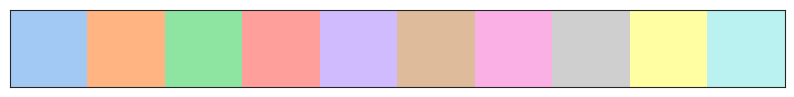

In [337]:

# Save a palette to a variable:
palette = sns.color_palette("pastel")

# Use palplot and pass in the variable:
sns.palplot(palette)

Normalization of Temperature

In [338]:
day.temp
t_min = -8
t_max = 39

day['t_temp'] = (t_max - t_min)* day.temp + t_min

In [339]:
hour.temp
t_min = -8
t_max = 39

hour['t_temp'] = (t_max - t_min)* hour.temp + t_min

### Renaming the Columns

In [340]:
# Renaming the Columns

day.rename(columns={"instant": "ID", "dteday": "date", "yr": "year", "mnth": "month", "hum": "humidity", "atemp": "ftemp", "cnt": "count", "weathersit":"weather_condition"}, inplace=True)
hour.rename(columns={"instant": "ID", "dteday": "date", "yr": "year", "mnth": "month", "hum": "humidity", "atemp": "ftemp", "cnt": "count", "hr": "hour", "weathersit":"weather_condition"}, inplace=True)



In [341]:
# converting season day
day['season'] = day.season.map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}).astype('category')
hour['season'] = day.season.map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}).astype('category')

# converting month
day['month'] = day.month.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Dec'}).astype('category')
hour['month'] = hour.month.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Dec'}).astype('category')

# converting weekday
day['weekday'] = day.weekday.map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}).astype('category')
hour['weekday'] = hour.weekday.map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}).astype('category')

# converting year
day['year'] = day.year.map({0: '2011', 1: '2012'}).astype('category')
hour['year'] = hour.year.map({0: '2011', 1: '2012'}).astype('category')

# converting holiday
day['holiday'] = day['holiday'].astype('category')

# converting working day
day['workingday'] = day['workingday'].astype('category')

# converting weather
day['weather_condition'] = day['weather_condition'].astype('category')



Numerical attributes to category

In [ ]:
#Type casting the datetime and numerical attributes to category

# day['season']=day.season.astype('category')
# day['year']=day.year.astype('category')
# day['month']=day.month.astype('category')
# day['holiday']=day.holiday.astype('category')
# day['weekday']=day.weekday.astype('category')
# day['workingday']=day.workingday.astype('category')
# day['weather_condition']=day.weather_condition.astype('category')

In [342]:
day.head()

,ID,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,ftemp,humidity,windspeed,casual,registered,count,t_temp
0,1,2011-01-01,winter,2011,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,8.175849
1,2,2011-01-02,winter,2011,Jan,0,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,9.083466
2,3,2011-01-03,winter,2011,Jan,0,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.229108
3,4,2011-01-04,winter,2011,Jan,0,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.400000
4,5,2011-01-05,winter,2011,Jan,0,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2.666979


In [343]:
hour.head()

,ID,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,ftemp,humidity,windspeed,casual,registered,count,t_temp
0,1,2011-01-01,NaN,2011,Jan,0,0,Sat,0,1,0.24,0.2879,0.81,0.0,3,13,16,3.28
1,2,2011-01-01,NaN,2011,Jan,1,0,Sat,0,1,0.22,0.2727,0.80,0.0,8,32,40,2.34
2,3,2011-01-01,NaN,2011,Jan,2,0,Sat,0,1,0.22,0.2727,0.80,0.0,5,27,32,2.34
3,4,2011-01-01,NaN,2011,Jan,3,0,Sat,0,1,0.24,0.2879,0.75,0.0,3,10,13,3.28
4,5,2011-01-01,NaN,2011,Jan,4,0,Sat,0,1,0.24,0.2879,0.75,0.0,0,1,1,3.28


In [344]:
# Isna: Detect missing values for an array-like object. 
# This function takes a scalar or array-like object and indicates whether values are missing
# Shape: Printing number of rows and columns 

day.shape
day.isna()

,ID,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,ftemp,humidity,windspeed,casual,registered,count,t_temp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [345]:
# rounding the numb after the comma 
day = round(day, 2)
hour = round(day, 2)

In [346]:
#printing the first rows
day.head()

,ID,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,ftemp,humidity,windspeed,casual,registered,count,t_temp
0,1,2011-01-01,winter,2011,Jan,0,Sat,0,2,0.34,0.36,0.81,0.16,331,654,985,8.18
1,2,2011-01-02,winter,2011,Jan,0,Sun,0,2,0.36,0.35,0.70,0.25,131,670,801,9.08
2,3,2011-01-03,winter,2011,Jan,0,Mon,1,1,0.20,0.19,0.44,0.25,120,1229,1349,1.23
3,4,2011-01-04,winter,2011,Jan,0,Tue,1,1,0.20,0.21,0.59,0.16,108,1454,1562,1.40
4,5,2011-01-05,winter,2011,Jan,0,Wed,1,1,0.23,0.23,0.44,0.19,82,1518,1600,2.67


In [347]:
day.tail()

,ID,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,ftemp,humidity,windspeed,casual,registered,count,t_temp
726,727,2012-12-27,winter,2012,Dec,0,Thu,1,2,0.25,0.23,0.65,0.35,247,1867,2114,3.95
727,728,2012-12-28,winter,2012,Dec,0,Fri,1,2,0.25,0.26,0.59,0.16,644,2451,3095,3.91
728,729,2012-12-29,winter,2012,Dec,0,Sat,0,2,0.25,0.24,0.75,0.12,159,1182,1341,3.91
729,730,2012-12-30,winter,2012,Dec,0,Sun,0,1,0.26,0.23,0.48,0.35,364,1432,1796,4.02
730,731,2012-12-31,winter,2012,Dec,0,Mon,1,2,0.22,0.22,0.58,0.15,439,2290,2729,2.14


In [348]:
#Find the total number of missing values from the entire dataset
day.isnull().sum()
hour.isnull().sum()

ID                   0
date                 0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
ftemp                0
humidity             0
windspeed            0
casual               0
registered           0
count                0
t_temp               0
dtype: int64

Info of Datatypes

In [349]:
day.info()
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 731 non-null    int64         
 1   date               731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   weekday            731 non-null    category      
 7   workingday         731 non-null    category      
 8   weather_condition  731 non-null    category      
 9   temp               731 non-null    float64       
 10  ftemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

Converting the Categories

In [350]:
# converting weekday
# day['weekday'] = day['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}).astype('category')
# hour['weekday'] = hour['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}).astype('category')

day.head()

,ID,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,ftemp,humidity,windspeed,casual,registered,count,t_temp
0,1,2011-01-01,winter,2011,Jan,0,Sat,0,2,0.34,0.36,0.81,0.16,331,654,985,8.18
1,2,2011-01-02,winter,2011,Jan,0,Sun,0,2,0.36,0.35,0.70,0.25,131,670,801,9.08
2,3,2011-01-03,winter,2011,Jan,0,Mon,1,1,0.20,0.19,0.44,0.25,120,1229,1349,1.23
3,4,2011-01-04,winter,2011,Jan,0,Tue,1,1,0.20,0.21,0.59,0.16,108,1454,1562,1.40
4,5,2011-01-05,winter,2011,Jan,0,Wed,1,1,0.23,0.23,0.44,0.19,82,1518,1600,2.67


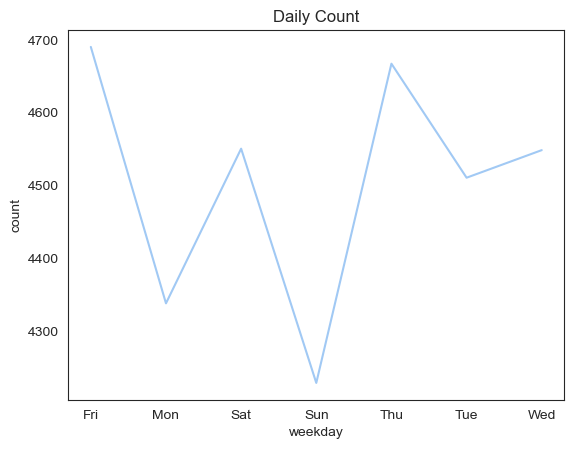

In [351]:
# Daily Count Weekdays

daily_count = day.groupby('weekday').agg({'count': 'mean'})
sns.lineplot(x = "weekday", y = "count", data= daily_count).set_title('Daily Count')
plt.show()

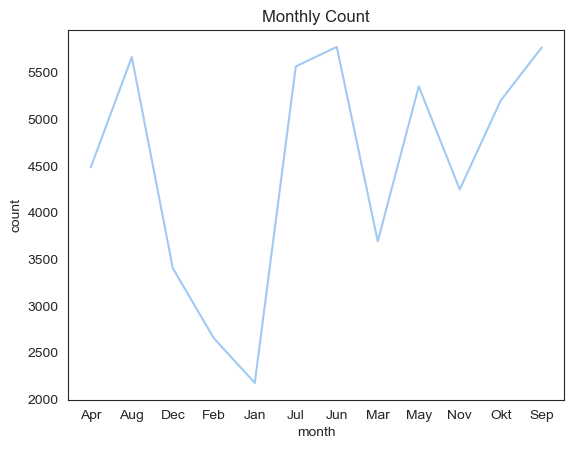

In [352]:
# Monthly Count

monthly_count = day.groupby('month').agg({'count': 'mean'})
sns.lineplot(x = "month", y = "count", data= monthly_count).set_title('Monthly Count')
plt.show()

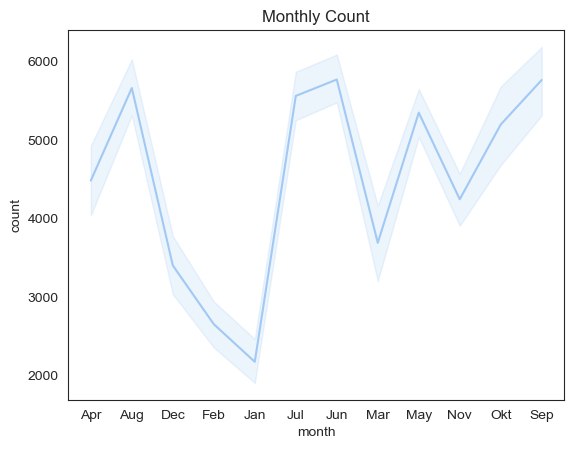

In [353]:

sns.lineplot(x = "month", y = "count", data= day).set_title('Monthly Count')
plt.show()

Text(0.5, 1.0, 'Seasons Count')

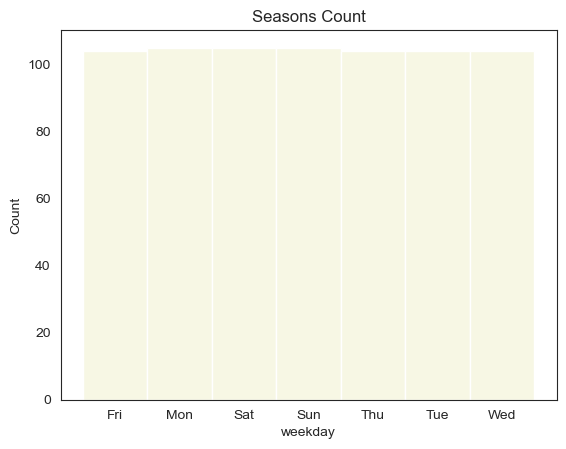

In [354]:
sns.histplot(data=day, x= "weekday", color= 'beige').set_title('Seasons Count')


Text(0.5, 1.0, 'Weekday Count')

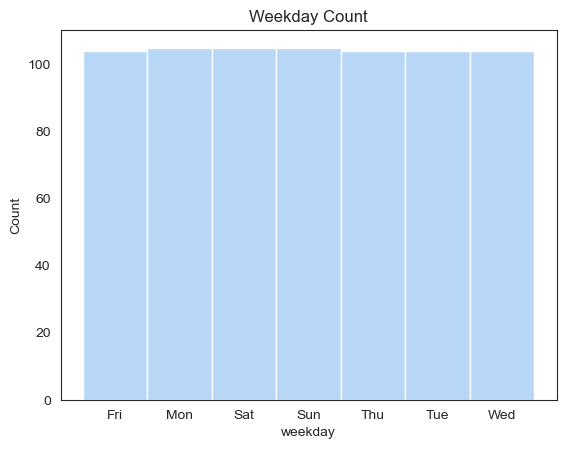

In [355]:
sns.histplot(data=day, x= "weekday").set_title('Weekday Count')

Text(0.5, 1.0, 'Casual')

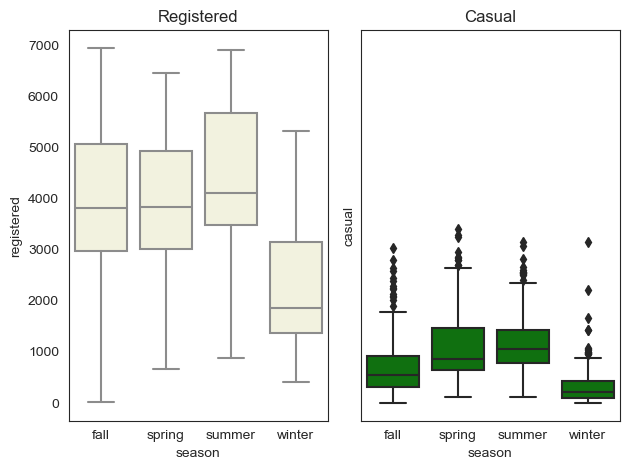

In [356]:
fig, axs = plt.subplots(1, 2, sharey="row", tight_layout=True) 
sns.set_palette("pastel")

sns.boxplot(ax = axs[0], data=day, x="season", y="registered", color='beige').set_title('Registered')
sns.boxplot(ax = axs[1], data=day, x="season", y="casual", color='green').set_title('Casual')

In [357]:
day.head()

,ID,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,ftemp,humidity,windspeed,casual,registered,count,t_temp
0,1,2011-01-01,winter,2011,Jan,0,Sat,0,2,0.34,0.36,0.81,0.16,331,654,985,8.18
1,2,2011-01-02,winter,2011,Jan,0,Sun,0,2,0.36,0.35,0.70,0.25,131,670,801,9.08
2,3,2011-01-03,winter,2011,Jan,0,Mon,1,1,0.20,0.19,0.44,0.25,120,1229,1349,1.23
3,4,2011-01-04,winter,2011,Jan,0,Tue,1,1,0.20,0.21,0.59,0.16,108,1454,1562,1.40
4,5,2011-01-05,winter,2011,Jan,0,Wed,1,1,0.23,0.23,0.44,0.19,82,1518,1600,2.67


Text(0.5, 1.0, 'Casual Users Working Day')

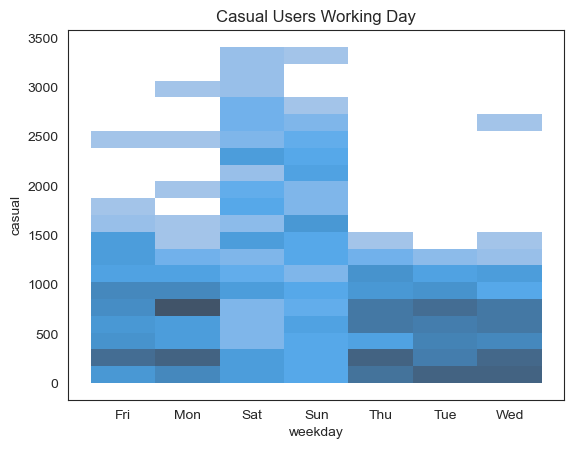

In [358]:
sns.histplot(data=day, x= "weekday", y="casual").set_title('Casual Users Working Day')


Text(0.5, 1.0, 'Registered Users Working Day')

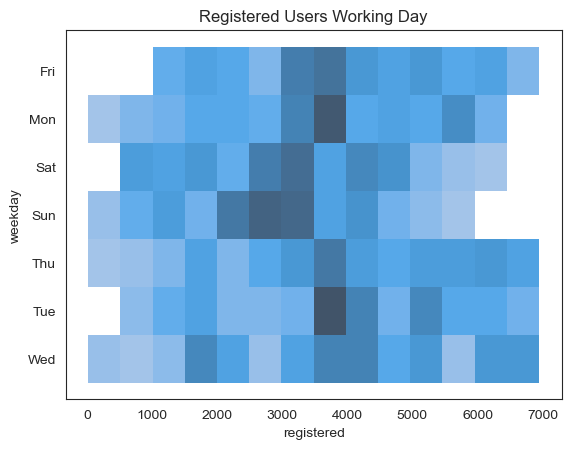

In [359]:
sns.histplot(data=day, x= "registered", y="weekday").set_title('Registered Users Working Day')

Text(0.5, 1.0, 'Working Day & Casual Users')

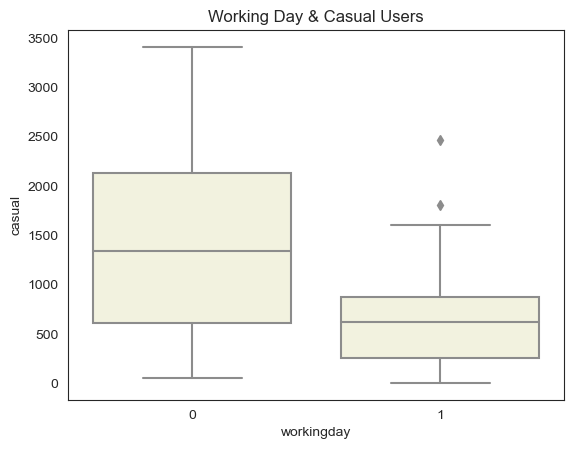

In [360]:
sns.boxplot(data=day, x= "workingday", y= "casual", color='beige').set_title('Working Day & Casual Users')


Text(0.5, 1.0, 'Season Hour')

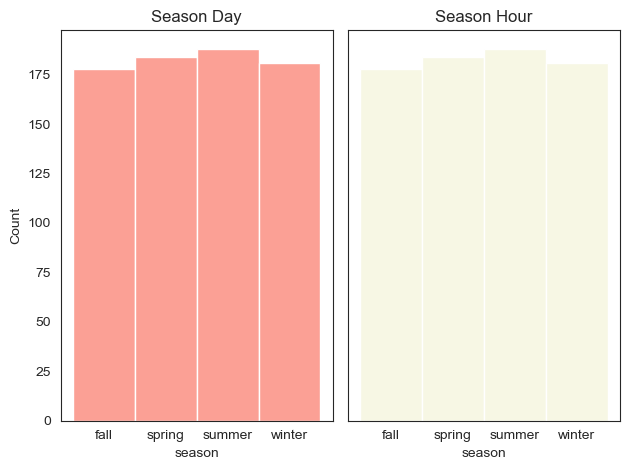

In [361]:
fig, axs = plt.subplots(1, 2, sharey="row", tight_layout=True) 

sns.histplot(ax = axs[0], data=day, x="season", color='salmon', bins=10).set_title('Season Day')
sns.histplot(ax = axs[1], data=hour, x="season", color='beige', bins=10).set_title('Season Hour')

<AxesSubplot:xlabel='workingday', ylabel='registered'>

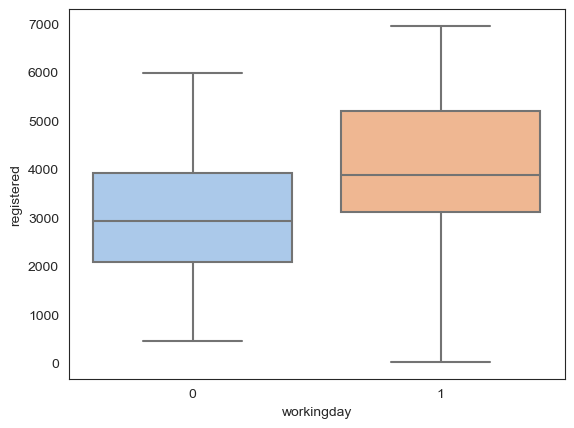

In [362]:
sns.boxplot(data=day, x= 'workingday', y= 'registered')

ValueError: x and y must be the same size

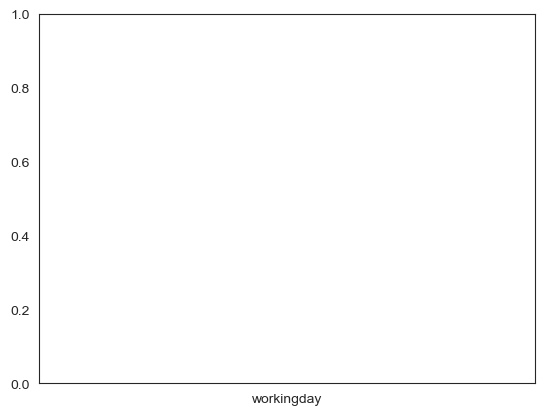

In [363]:
monthly_count = day.groupby('month').agg({'count': 'mean'})

x = 'workingday' 
y = 'count'
plt.scatter(x = "workingday", y = "count", data= monthly_count).set_title('Monthly Count')
plt.show()

Monthly distribution of counts

In [ ]:
#Bar plot for seasonwise monthly distribution of counts

fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')

sns.barplot(x='month',y='count',data=day[['month','count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()


Weekday wise monthly distribution of counts

In [ ]:
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='count',data=day[['month','count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

Yearly wise distribution of counts

In [ ]:
#Violin plot for yearly distribution of counts
fig,ax=plt.subplots(figsize=(15,8))
sns.violinplot(x='year',y='count',data=day[['year','count']])
ax.set_title('Yearly distribution of counts')
plt.show()

Barplot for Holiday distribution of counts

In [ ]:
#Barplot for Holiday distribution of counts

fig,ax=plt.subplots(figsize=(15,8))

sns.barplot(data=day,x='holiday',y='count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

# From the above bar plot, we can observed that during no holiday the bike rental counts is highest compared to during holiday for different seasons.
# Here, 0->No holiday, 1-> holiday


In [ ]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='count',data=day[['month','count','weather_condition']],ax=ax1)
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

# Plotting different type of weather against bike rental count indicates that the demand of bike rental 
# is about the same in clear, cloudy or misty hours, with better overall count in better weather. 
# Rainy and snowy days show significantly lower average rental count. 
# I believe our dataset do not contain observations in really bad weathers so the boxplot for weather type 4